In [2]:
from sklearn.datasets import load_digits

In [8]:
data = load_digits(as_frame=True)

### data.frame
- resize, crop
- 차원의 저주 문제, 1차원으로 변결 될 때 위치 정보가 손실되는 문제
- dimension reduction / local > Filter (Linear Filter : Correlation-Convolution)
- 전통적인 Filter 들은 차원의 저주 문제는 해결 못했음
- 그래서 시그널 처리 하는 Filter 영역의 관심을 갖기 시작 했음
- window size(내 주변 크기 보통 3 x 3) 
- 겹쳐서 하는 방법 : 데이터의 의미를 덜 잃어 버리지만 차원의 저주를 해결 하지 못할 가능성
- 겹치지 않는 방법 : view_as_blocks

In [38]:
from skimage.util import view_as_blocks, view_as_windows

In [12]:
from skimage.data import astronaut

In [13]:
data = astronaut()

In [16]:
data.shape

(512, 512, 3)

In [14]:
import matplotlib.pyplot as plt

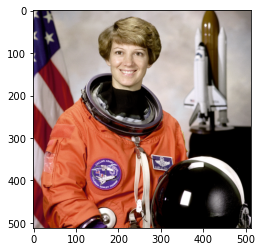

In [15]:
plt.imshow(data)

In [19]:
#view_as_blocks(data, (4,4)) # 3차원 인데 2차원이라 에러
view_as_blocks(data, (4,4,1)).shape # 겹치지 않는 방법

(128, 128, 3, 4, 4, 1)

In [20]:
# 컬러에서 흑백으로
from skimage.color import rgb2gray

In [54]:
data2 = rgb2gray(data) # 차원축소

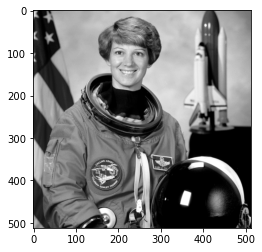

In [55]:
plt.imshow(data2, cmap='gray')

In [56]:
block = view_as_blocks(data2, (4,4)) # 

In [57]:
block16 = block.reshape(block.shape[0], block.shape[1], -1)

In [58]:
block16.shape

(128, 128, 16)

In [59]:
data3 = block16.max(axis=2) # 1 : max 풀링

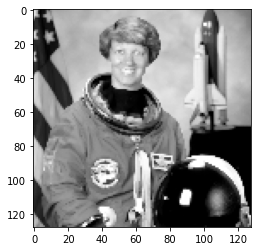

In [60]:
plt.imshow(data3, cmap='gray')

In [61]:
view_as_windows(data2, (4,4), 1).shape # stride trick

(509, 509, 4, 4)

In [67]:
data4 = view_as_windows(data2, (4,4), 2)

In [68]:
data4.shape

(255, 255, 4, 4)

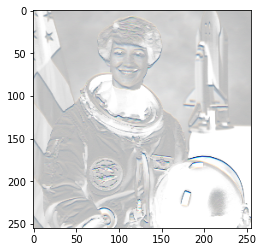

In [69]:
plt.imshow(data4.min(axis=-1), cmap='gray')

In [71]:
255*data2.astype('uint8')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### 개념적인 이미지 for 연산

In [80]:
import tensorflow as tf

In [81]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [83]:
im = X_train[0]

In [86]:
X_train.shape

(60000, 28, 28)

In [85]:
h, w = im.shape

In [87]:
import matplotlib.pyplot as plt

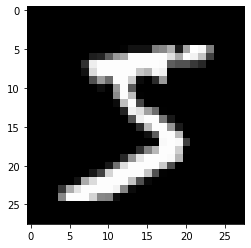

In [88]:
plt.imshow(im, cmap='gray')

In [89]:
im[0,0]

0

In [99]:
im_r = data[...,0]

In [102]:
def plot_img(img):
    im = img
    h,w = im.shape
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='gray')
    for y in range(h):
        for x in range(w):
            plt.annotate(str(im[y,x]), (x,y), 
                         horizontalalignment = 'center',
                         verticalalignment = 'center',
                         color= 'black' if im[y,x] > 128 else 'white')

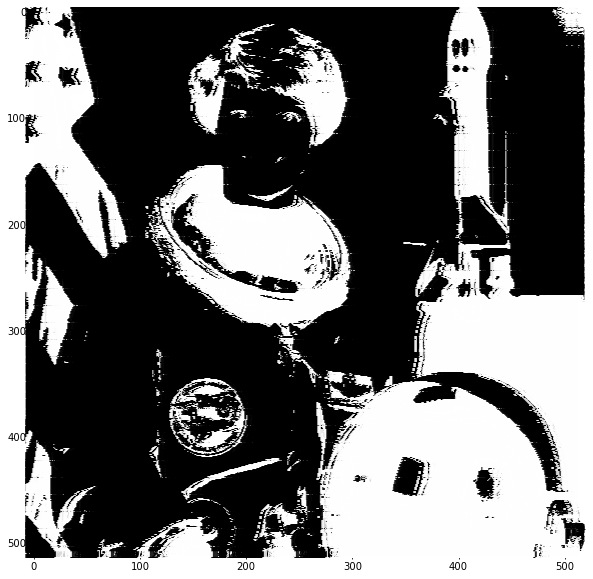

In [103]:
plot_img(im_r)

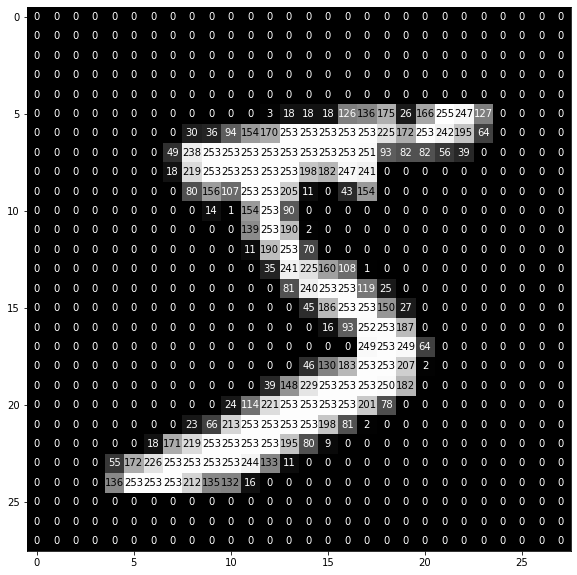

In [97]:
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='gray')

for y in range(h):
    for x in range(w):
        plt.annotate(str(im[y,x]), (x,y), 
                     horizontalalignment = 'center',
                     verticalalignment = 'center',
                     color= 'black' if im[y,x] > 128 else 'white')

- valid 에서 5x5 를 3x3 을 1칸씩 움직임: 5-3+1
- valid 에서 6x6 를 3x3 을1칸씩 움직임: 6-3+1
- valid 에서 512x512 를 4x4 을1칸씩 움직임: 512-4+1
- valid 에서 512x512 를 4x4 을 2칸씩 움직임: (512/2)-4+1

- 여러 개의 값을 하나로 만드는 표현 (통계) > reduction(reduce) MAP REDUCE

- 맥스 풀링을 해도 디테일은 줄어들어도 특징은 살아 있다. CNN 에서 맥스 풀링 한다
- min 풀링은 어두워 짐 : gradient 가 손실 될 가능성 큼
- global averaging : mean 풀링
- GPU 연산이 빠를 수 있는 이유는 이동하면서 연산이 아니라 잘라놓고 한꺼번에 연산